Nr of Scales: 83
scales [6.0, 6.430640775217759, 6.892190129982211, 7.386866480069498, 7.917047464637365, 8.485281374238571, 9.09429939906239, 9.747028756274826, 10.44660675955349, 11.19639589844169, 12.0, 12.861281550435518, 13.784380259964422, 14.773732960138997, 15.834094929274734, 16.970562748477143, 18.18859879812478, 19.494057512549652, 20.89321351910698, 22.39279179688338, 24.0, 25.722563100871035, 27.568760519928844, 29.547465920277997, 31.66818985854947, 33.941125496954285, 36.37719759624956, 38.988115025099304, 41.78642703821397, 44.785583593766766, 48.0, 51.44512620174207, 55.13752103985769, 59.094931840555994, 63.33637971709894, 67.88225099390857, 72.75439519249912, 77.97623005019861, 83.57285407642794, 89.57116718753353, 96.0, 102.89025240348418, 110.27504207971538, 118.18986368111194, 126.67275943419789, 135.76450198781714, 145.50879038499826, 155.95246010039722, 167.14570815285592, 179.14233437506707, 192.0, 205.78050480696837, 220.55008415943075, 236.37972736222406, 253

<Figure size 1000x600 with 0 Axes>

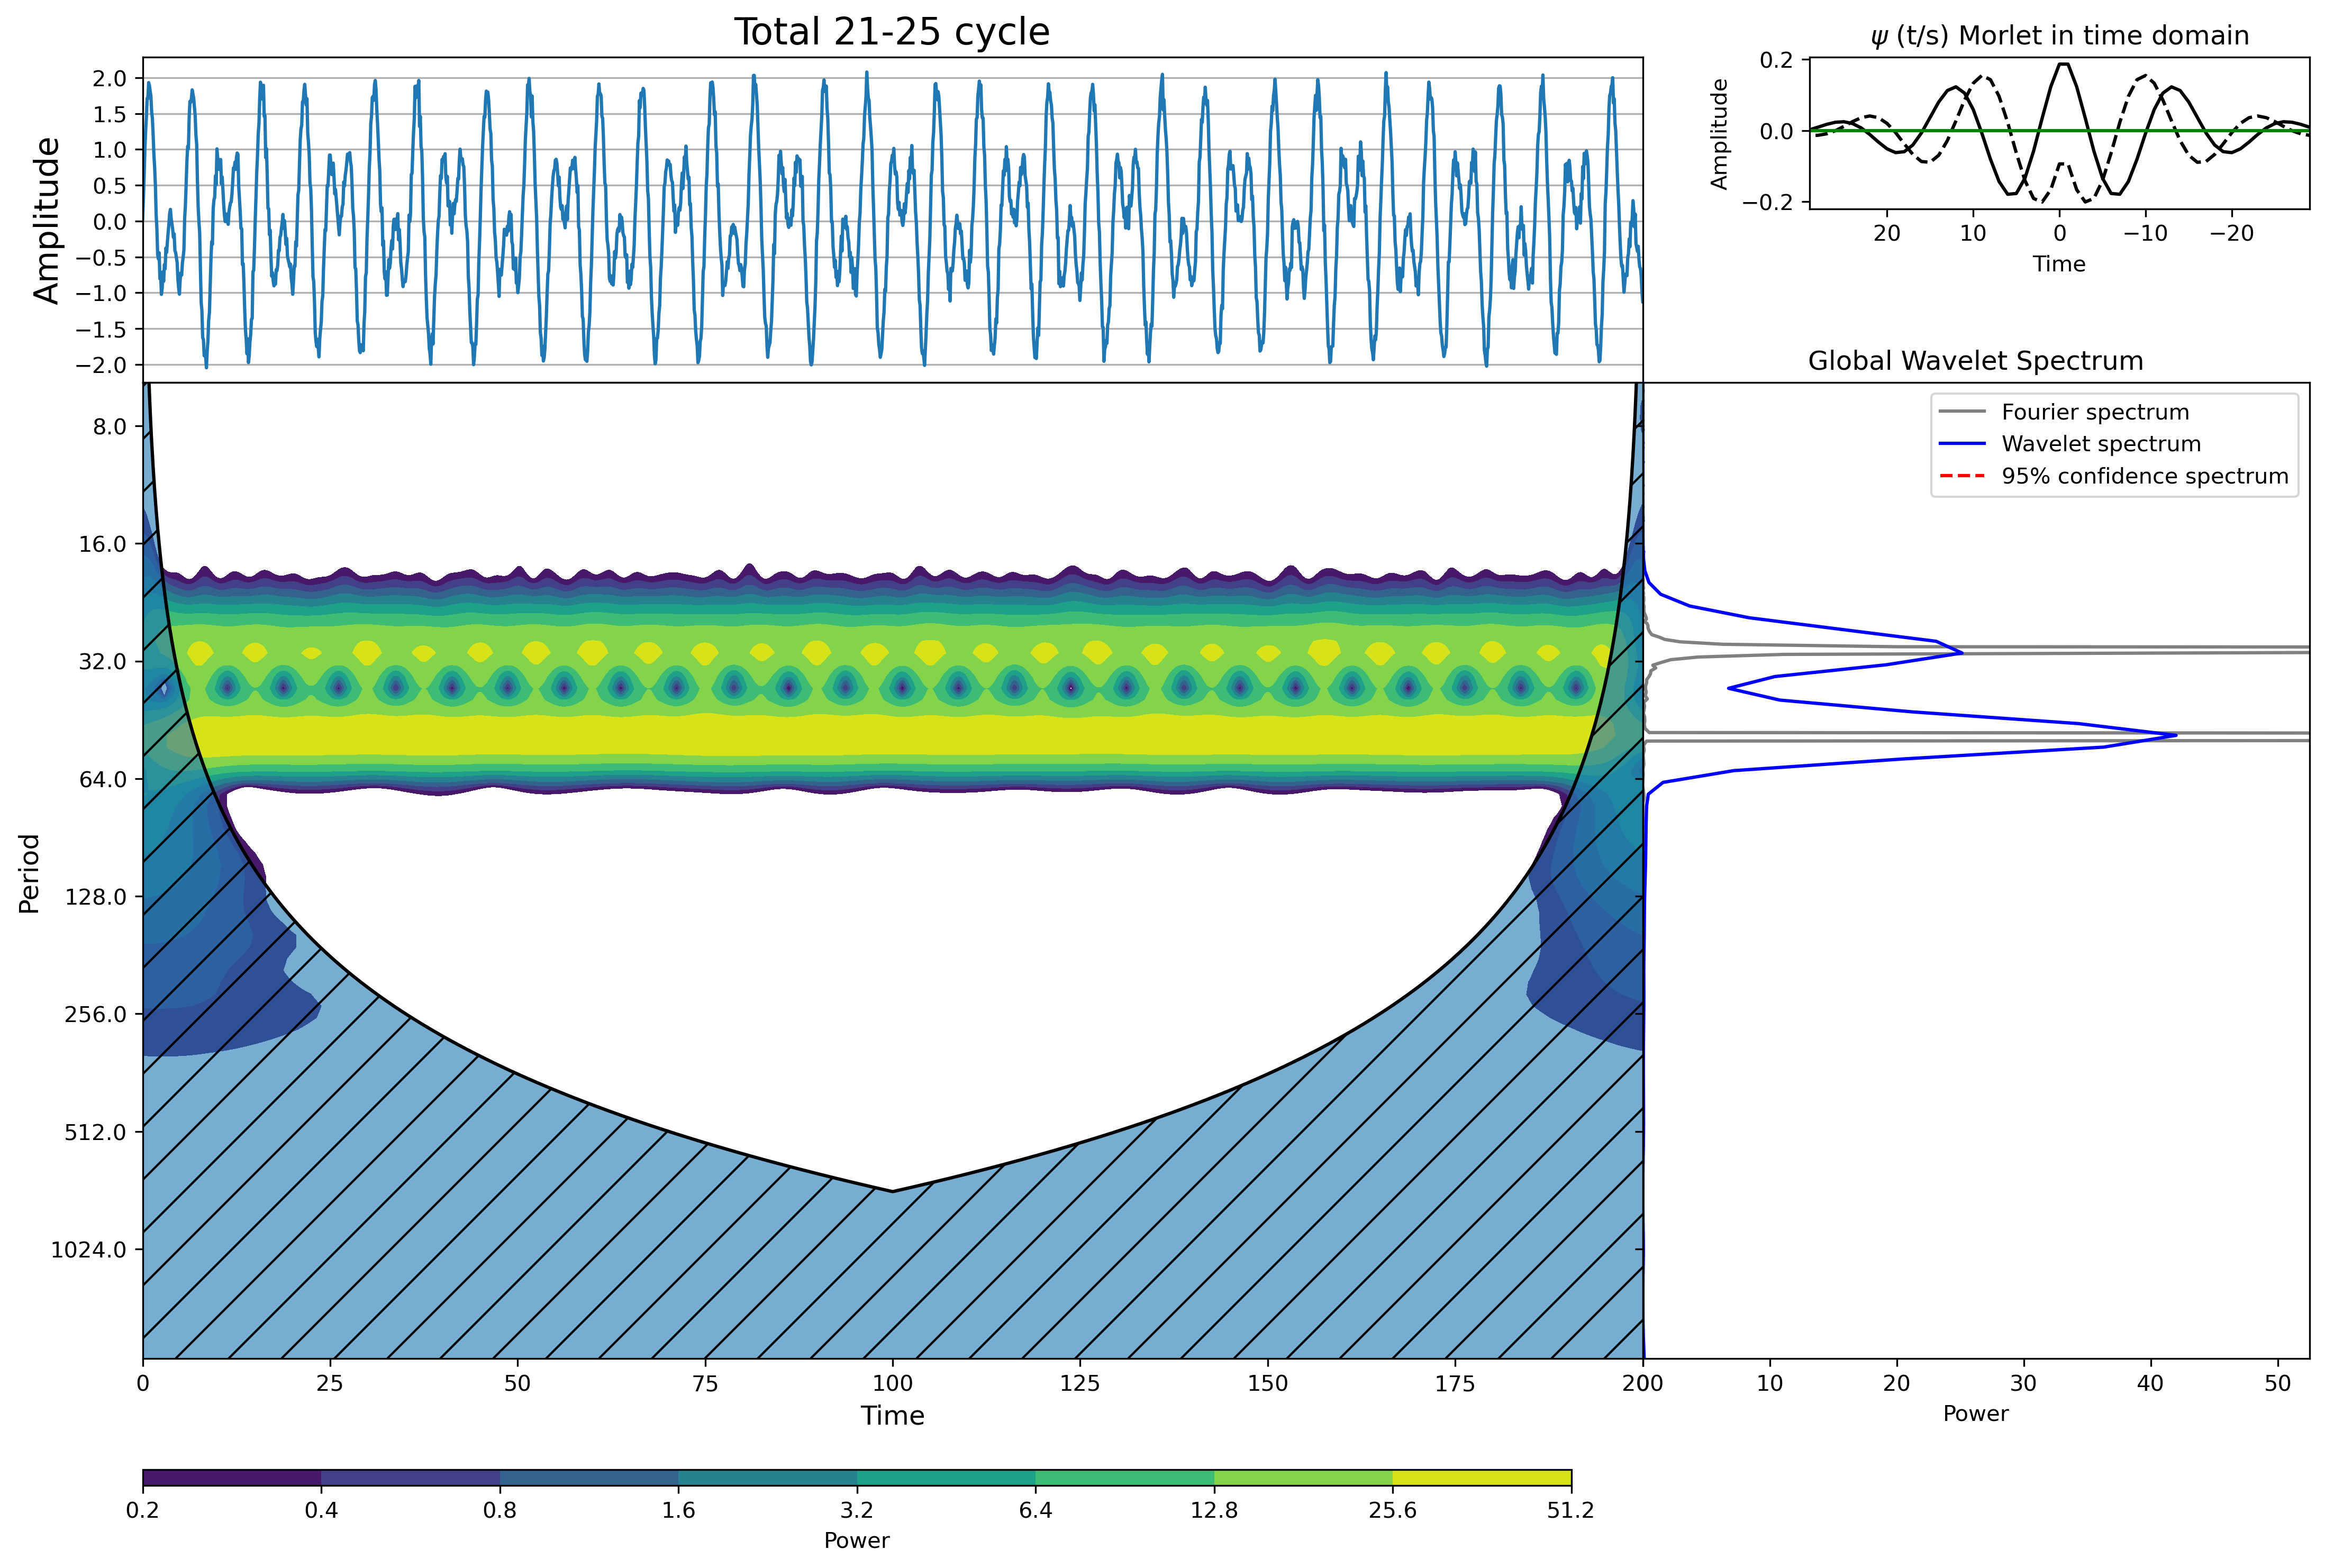

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import waipy


N = 2000
t = np.linspace(0, 200, N)
f = np.sin(2 * np.pi * t / 5) + np.sin(2 * np.pi * t / 3) + np.random.normal(0, 0.1, N)

s0 = 1  # Smallest scale (e.g., daily cycles)
s1 = 10  # Largest scale (e.g., longer-term patterns)
ds = 0.1  # Scale step
nvoice = 6  # Number of octaves per scale
alpha = 6  # Alpha parameter for Morlet wavelet
mother = 'Morlet'  # Wavelet type

# Perform wavelet analysis
result = waipy.cwt(f, s0, s1, ds, nvoice, (s1-s0)/ds, alpha, 6, mother=mother, name="Morlet")

label = 'Total 21-25 cycle'
time = t
plt.figure(figsize=(10, 6))
waipy.wavelet_plot(label, time, f, ds, result, plot_power=False, contour_levels=20, yscale='linear', ylabel='Period')
# plt.savefig("/content/drive/MyDrive/Solar_index/output/Wavelet_21-25_cycle_Total.png")
plt.show()



Nr of Scales: 117
scales [6.0, 6.430640775217759, 6.892190129982211, 7.386866480069498, 7.917047464637365, 8.485281374238571, 9.09429939906239, 9.747028756274826, 10.44660675955349, 11.19639589844169, 12.0, 12.861281550435518, 13.784380259964422, 14.773732960138997, 15.834094929274734, 16.970562748477143, 18.18859879812478, 19.494057512549652, 20.89321351910698, 22.39279179688338, 24.0, 25.722563100871035, 27.568760519928844, 29.547465920277997, 31.66818985854947, 33.941125496954285, 36.37719759624956, 38.988115025099304, 41.78642703821397, 44.785583593766766, 48.0, 51.44512620174207, 55.13752103985769, 59.094931840555994, 63.33637971709894, 67.88225099390857, 72.75439519249912, 77.97623005019861, 83.57285407642794, 89.57116718753353, 96.0, 102.89025240348418, 110.27504207971538, 118.18986368111194, 126.67275943419789, 135.76450198781714, 145.50879038499826, 155.95246010039722, 167.14570815285592, 179.14233437506707, 192.0, 205.78050480696837, 220.55008415943075, 236.37972736222406, 25

<Figure size 1000x600 with 0 Axes>

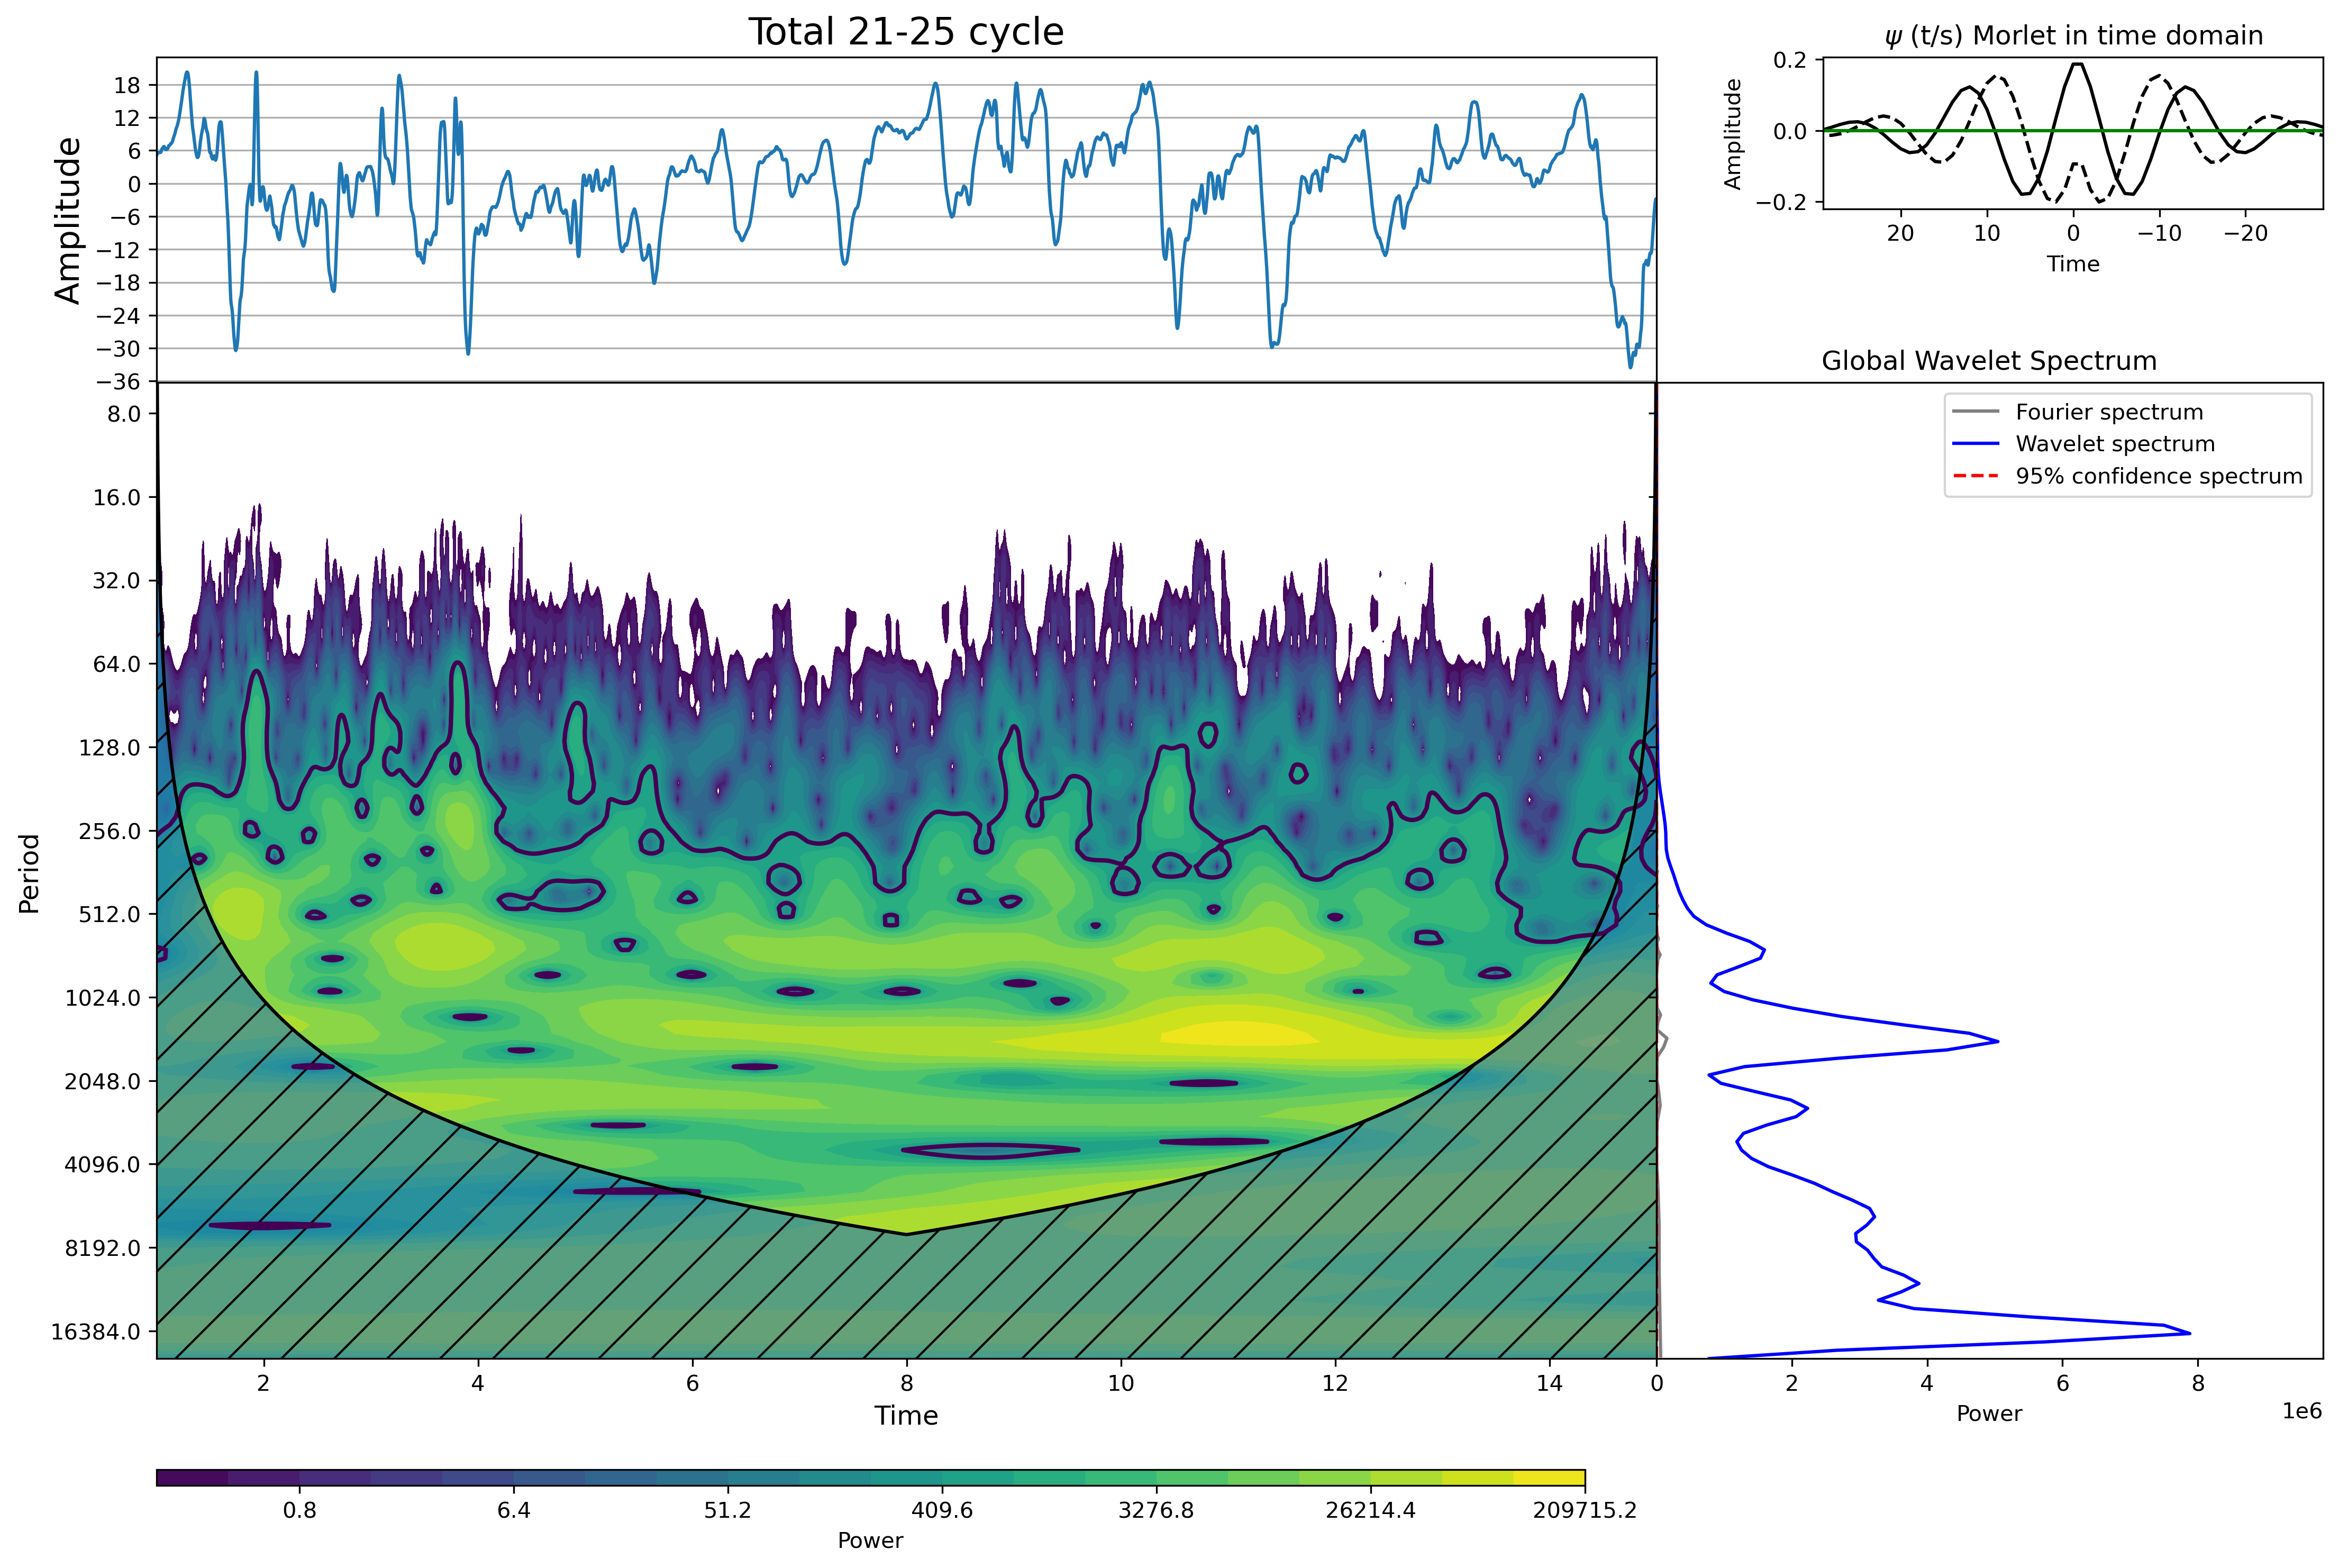

In [2]:
import streamlit as st
import numpy as np
import pandas as pd
import pywt
import waipy
import altair as alt

datapath = '../pages/app_data/current_data.csv'
data = pd.read_csv(datapath)

s0 = 1  # Smallest scale (e.g., daily cycles)
s1 = 10  # Largest scale (e.g., longer-term patterns)
ds = 0.1  # Scale step
nvoice = 6  # Number of octaves per scale
alpha = 6  # Alpha parameter for Morlet wavelet
mother = 'Morlet'  # Wavelet type

# Perform wavelet analysis
result = waipy.cwt(data.y, s0, s1, ds, nvoice, (s1-s0)/ds, alpha, 6, mother=mother, name="Morlet")

label = 'Total 21-25 cycle'
plt.figure(figsize=(10, 6))
waipy.wavelet_plot(label, data.x, data.y, ds, result, plot_power=False, contour_levels=20, yscale='linear', ylabel='Period')
# plt.savefig("/content/drive/MyDrive/Solar_index/output/Wavelet_21-25_cycle_Total.png")
plt.show()

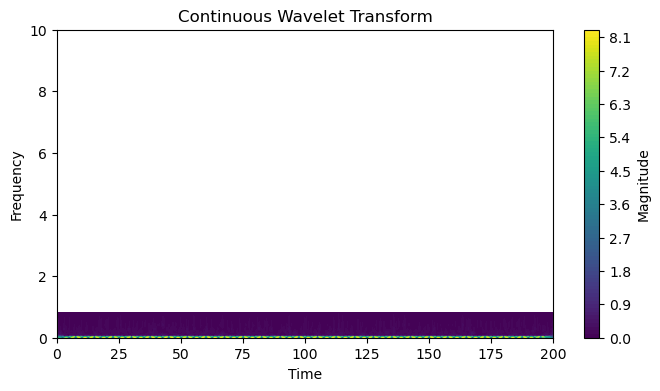

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Example time series data
N = 2000
t = np.linspace(0, 200, N)
dt = t[1] - t[0]
f = np.sin(2 * np.pi * t / 5) + np.sin(2 * np.pi * t / 3) + np.random.normal(0, 0.1, N)

# Performing Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)
coef, freqs = pywt.cwt(f, scales, 'morl')

# Plotting
plt.figure(figsize=(8, 4))
plt.contourf(t, freqs, np.abs(coef), 100)
plt.colorbar(label='Magnitude')
plt.ylim([0, 10])  # Set frequency range for better visualization
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Continuous Wavelet Transform')
plt.show()
